In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

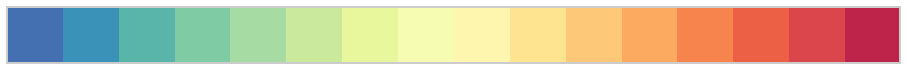

In [537]:
sns.choose_colorbrewer_palette("d")

In [539]:
sns.set()
sns.set_style("white", rc={
    'axes.grid': False,
    'axes.labelcolor': '0.4',
    'axes.edgecolor': '0.8',
    'axes.facecolor': '1.0',
    'text.color': '0.4',
    'xtick.color': '0.4',
    'ytick.color': '0.4',
    'axes.linewidth': 2,
})
palette = sns.color_palette("Spectral_r", 325)
sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.2)

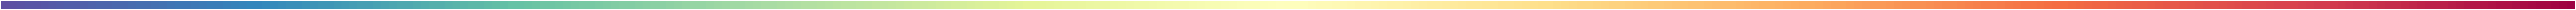

In [540]:
sns.palplot(palette)

In [322]:
data = pd.read_csv("Assets/Logs/species.csv", header=None, names=["generation", "species", "size", "fitness"])
data

,generation,species,size,fitness
0,1,0,500,2.000000
1,2,0,499,1.997990
2,2,1,1,1.002000
3,3,0,457,1.914001
4,3,1,43,1.086000
5,4,0,435,1.869996
6,4,1,65,1.130000
7,5,1,80,1.160001
8,5,0,420,1.840007
9,6,1,204,1.408000


In [304]:
df = data.groupby(["generation", "species"])["size"].first().unstack("species").fillna(0)
df

species,0,1,2,3,4,5,6,7,8,9,...,316,317,318,319,320,321,322,323,324,325
generation,,,,,,,,,,,,,,,,,,,,,
1,500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,499,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,457,43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,435,65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,420,80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,296,204,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,219,281,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,297,203,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,220,278,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


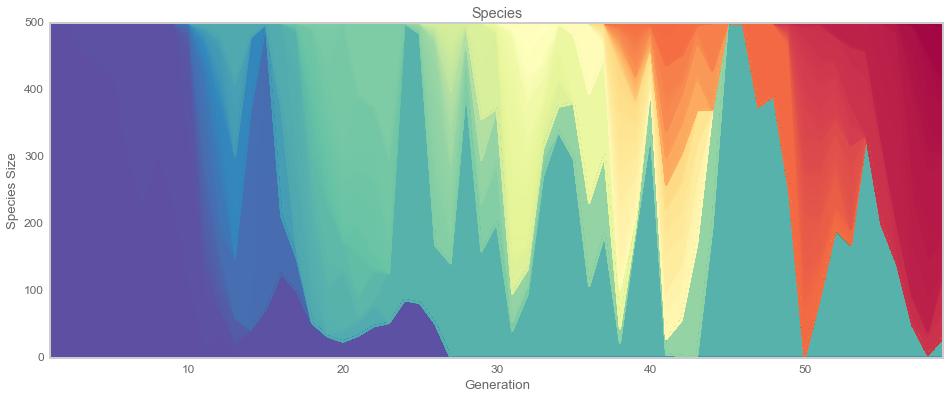

In [541]:
ax = df.plot(kind="area", stacked=True, legend=False, title="Species", figsize=(16, 6), color=palette)
ax.set_xlabel("Generation")
ax.set_ylabel("Species Size")

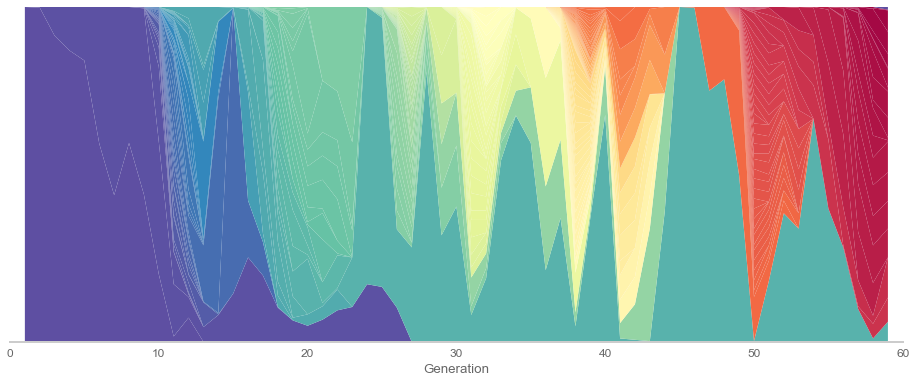

In [581]:
from matplotlib import transforms

X = df.index.values
Y = [df[c] for c in df.columns.values]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)

plt.stackplot(X, *Y, colors=palette, baseline="zero", linewidths=0)
# plt.stackplot(X, *Y, colors=palette, baseline="wiggle", linewidths=0)
# plt.stackplot(X, *Y, colors=palette, baseline="wiggle", linewidths=0)

ax.set_xlabel("Generation")
ax.set_ylabel("Species Size")
ax.get_yaxis().set_visible(False)

sns.despine(left=True, trim=True)